In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import pickle
from scipy.ndimage import gaussian_filter

%matplotlib inline

In [2]:
def get_rewards(exp_name = "", sigma=100, key = "rewards"):
    filehandler = open("/Users/aidancurtis/remote_solution_data/solution_data_new/"+str(exp_name)+"/exp_dict.pkl", 'rb')
    
    exp_dict = pickle.load(filehandler)
    return gaussian_filter(np.array( exp_dict[key]), sigma)
     
    
def plot_group_rewards(exp_names = [], sigma=300, key="rewards"):
    group_rewards = []
    for exp_name in exp_names:
        group_rewards.append(get_rewards(exp_name, sigma=sigma, key=key))
    
    min_length = min([len(gr) for gr in group_rewards])
    trimmed_group_rewards = []
    for group_reward in group_rewards:
        trimmed_group_rewards.append(np.expand_dims(group_reward[:min_length], axis=0))
    
    trimmed_group_rewards = np.concatenate(trimmed_group_rewards, axis=0)
    trimmed_mean = np.mean(trimmed_group_rewards, axis=0)
    trimmed_std = np.std(trimmed_group_rewards, axis=0)
    
    plt.fill_between(np.arange(min_length), trimmed_mean-trimmed_std, trimmed_mean+trimmed_std, alpha = 0.3)
    plt.plot(trimmed_mean)
    

## First, testing to make sure RL is working and looking at different hyperparams in this environment

Text(0.5, 1.0, 'Maximize x/y position with standard reparameterization')

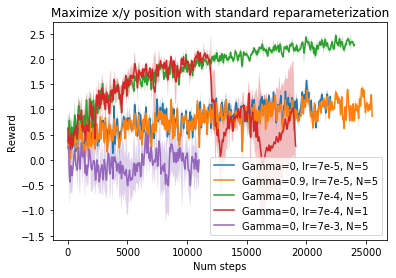

In [1590]:

# rewards = plot_group_rewards(["test1", "test2", "test3", "test4"])
rewards = plot_group_rewards(["param2_test1", "param2_test2", "param2_test3", "param2_test4"])
rewards = plot_group_rewards(["param2_test1_gamma=0.9", "param2_test2_gamma=0.9", "param2_test3_gamma=0.9", "param2_test4_gamma=0.9"])
rewards = plot_group_rewards(["param2_test1_lr=7e-4", "param2_test2_lr=7e-4", "param2_test3_lr=7e-4", "param2_test4_lr=7e-4"])
rewards = plot_group_rewards(["param2_test1_n=1", "param2_test2_n=1", "param2_test3_n=1", "param2_test4_n=1"])
rewards = plot_group_rewards(["param2_test1_lr=7e-3", "param2_test2_lr=7e-3", "param2_test3_lr=7e-3", "param2_test4_lr=7e-3"])
plt.xlabel("Num steps")
plt.ylabel("Reward")
plt.legend(["Gamma=0, lr=7e-5, N=5", "Gamma=0.9, lr=7e-5, N=5", "Gamma=0, lr=7e-4, N=5", "Gamma=0, lr=7e-4, N=1", "Gamma=0, lr=7e-3, N=5"])
plt.title("Maximize x/y position with standard reparameterization")



## Simple RL Testing w/ a Single-Step Task: Two-Stack

Text(0.5, 1.0, 'Maximize x/y position with standard reparameterization')

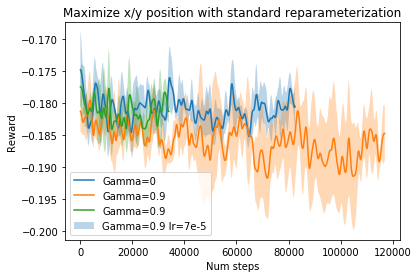

In [1362]:
rewards = plot_group_rewards(["twostack_test1", "twostack_test2", "twostack_test3", "twostack_test4"])
rewards = plot_group_rewards(["twostack_test1_gamma=0.9", "twostack_test2_gamma=0.9", "twostack_test3_gamma=0.9", "twostack_test4_gamma=0.9"])
rewards = plot_group_rewards(["twostack_test1_lr=7e-5", "twostack_test2_lr=7e-5", "twostack_test3_lr=7e-5", "twostack_test4_lr=7e-5"])

plt.xlabel("Num steps")
plt.ylabel("Reward")
plt.legend(["Gamma=0", "Gamma=0.9", "Gamma=0.9", "Gamma=0.9 lr=7e-5"])
plt.title("Maximize x/y position with standard reparameterization")


### Testing other combinations to find one that learns
#### Conclusions: Even two-stack is too sparse and will require some sort of experience replay balancing

Text(0.5, 1.0, 'Maximize x/y position with standard reparameterization')

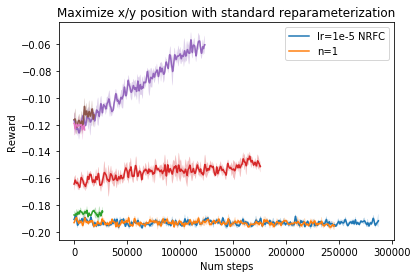

In [1357]:

rewards = plot_group_rewards(["twostack_test1_nogamma", "twostack_test2_nogamma", "twostack_test3_nogamma", "twostack_test4_nogamma"])
rewards = plot_group_rewards(["twostack_test1_reparam", "twostack_test2_reparam", "twostack_test3_reparam", "twostack_test4_reparam"])
#Div3
rewards = plot_group_rewards(["twostack_test1_nonreparam", "twostack_test2_nonreparam", "twostack_test3_nonreparam", "twostack_test4_nonreparam"])
#Div5
rewards = plot_group_rewards(["twostack_test1_div5", "twostack_test2_div5", "twostack_test3_div5", "twostack_test4_div5"])
#Div8
rewards = plot_group_rewards(["twostack_test1_div8", "twostack_test2_div8", "twostack_test3_div8", "twostack_test4_div8"])
rewards = plot_group_rewards(["twostack_test1_div8_highlr", "twostack_test2_div8_highlr", "twostack_test3_div8_highlr", "twostack_test4_div8_highlr"])
rewards = plot_group_rewards(["twostack_test1_div8_nogamma", "twostack_test2_div8_nogamma", "twostack_test3_div8_nogamma", "twostack_test4_div8_nogamma"])

plt.xlabel("Num steps")
plt.ylabel("Reward")
plt.legend(["lr=1e-5 NRFC", "n=1"])
plt.title("Maximize x/y position with standard reparameterization")

### Testing out Balanced vs Unbalanced Experience Replay

Text(0.5, 1.0, 'Performance on 2-Stack under different splits')

/usr/local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


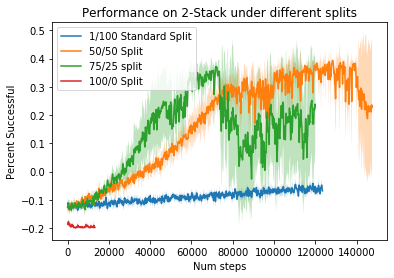

In [79]:
rewards = plot_group_rewards(["twostack_test1_div8", "twostack_test2_div8", "twostack_test3_div8", "twostack_test4_div8"])
rewards = plot_group_rewards(["twostack_test1_div8_highlr", "twostack_test2_div8_highlr", "twostack_test3_div8_highlr", "twostack_test4_div8_highlr"])
rewards = plot_group_rewards(["twostack_test1_div8_n=2", "twostack_test2_div8_n=2", "twostack_test3_div8_n=2", "twostack_test4_div8_n=2"])
rewards = plot_group_rewards(["twostack_test1_div8_lr=5e-3", "twostack_test2_div8_lr=5e-3", "twostack_test3_div8_lr=5e-3", "twostack_test4_div8_lr=5e-3"])

plt.xlabel("Num steps")
plt.ylabel("Percent Successful")
plt.legend(["1/100 Standard Split", "50/50 Split", "75/25 split", "100/0 Split"])
plt.title("Performance on 2-Stack under different splits")

## Getting 2 stack learning to work within CSP

Text(0.5, 1.0, 'Performance on 2-Stack under different splits')

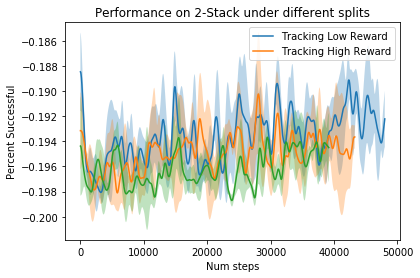

In [172]:
# rewards = plot_group_rewards(["csp_2stack1", "csp_2stack2", "csp_2stack3", "csp_2stack4"])
# rewards = plot_group_rewards(["single1", "single2", "single3", "single4"])
# rewards = plot_group_rewards(["2stack_1", "2stack_2", "2stack_3", "2stack_4"])
rewards = plot_group_rewards(["pnoise1", "pnoise2", "pnoise3", "pnoise4"])
rewards = plot_group_rewards(["high_reward_1", "high_reward_2", "high_reward_3", "high_reward_4"])
rewards = plot_group_rewards(["massive1", "massive2", "massive3", "massive4"])

plt.xlabel("Num steps")
plt.ylabel("Percent Successful")
plt.legend(["Tracking Low Reward", "Tracking High Reward"])
plt.title("Performance on 2-Stack under different splits")

## Imitation Learning Time

Text(0.5, 1.0, 'Performance on 2-Stack under different splits')

/Users/aidancurtis/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/aidancurtis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


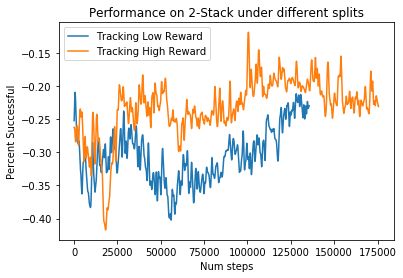

In [243]:
# rewards = plot_group_rewards(["csp_2stack1", "csp_2stack2", "csp_2stack3", "csp_2stack4"])
# rewards = plot_group_rewards(["single1", "single2", "single3", "single4"])
# rewards = plot_group_rewards(["2stack_1", "2stack_2", "2stack_3", "2stack_4"])
# rewards = plot_group_rewards(["standard1", "standard2", "standard3", "standard4"])
# rewards = plot_group_rewards(["subsample","subsample2","subsample3","subsample4"])
# rewards = plot_group_rewards(["pubsample","pubsample2","pubsample3","pubsample4"])
rewards = plot_group_rewards(["pp1", "pp2", "pp3", "pp4"])
rewards = plot_group_rewards(["ppp1", "ppp2", "ppp3", "ppp4"])


plt.xlabel("Num steps")
plt.ylabel("Percent Successful")
plt.legend(["Tracking Low Reward", "Tracking High Reward"])
plt.title("Performance on 2-Stack under different splits")

## Visualize GAIL Losses

In [25]:
losses = plot_group_rewards(["first_save_test"], key="gail_loss", sigma=10)
losses = plot_group_rewards(["hc_test"], key="gail_loss", sigma=10)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aidancurtis/remote_solution_data/solution_data_new/first_save_test/exp_dict.pkl'

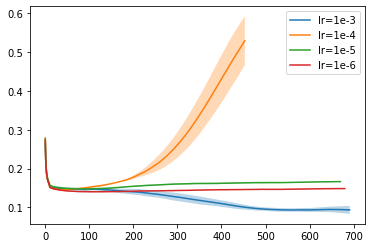

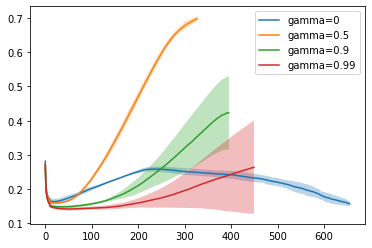

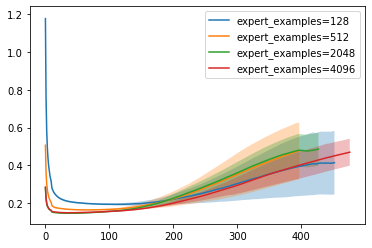

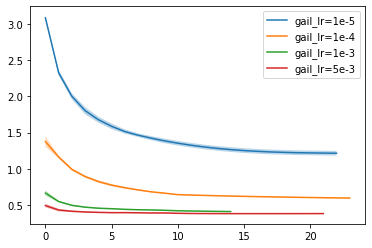

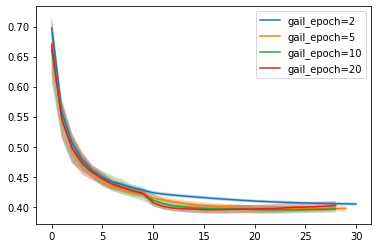

In [27]:
losses = plot_group_rewards(["1::lr=1e-3","2::lr=1e-3","3::lr=1e-3","4::lr=1e-3"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::lr=1e-4","2::lr=1e-4","3::lr=1e-4","4::lr=1e-4"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::lr=1e-5","2::lr=1e-5","3::lr=1e-5","4::lr=1e-5"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::lr=1e-6","2::lr=1e-6","3::lr=1e-6","4::lr=1e-6"], key="gail_loss", sigma=0)

plt.legend(["lr=1e-3", "lr=1e-4", "lr=1e-5", "lr=1e-6"])
plt.figure()

losses = plot_group_rewards(["1::gamma=0","2::gamma=0","3::gamma=0","4::gamma=0"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gamma=0.5","2::gamma=0.5","3::gamma=0.5","4::gamma=0.5"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gamma=0.9","2::gamma=0.9","3::gamma=0.9","4::gamma=0.9"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gamma=0.99","2::gamma=0.99","3::gamma=0.99","4::gamma=0.99"], key="gail_loss", sigma=0)

plt.legend(["gamma=0", "gamma=0.5", "gamma=0.9", "gamma=0.99"])

plt.figure()

losses = plot_group_rewards(["1::expert_examples=128","2::expert_examples=128","3::expert_examples=128","4::expert_examples=128"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::expert_examples=512","2::expert_examples=512","3::expert_examples=512","4::expert_examples=512"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::expert_examples=2048","2::expert_examples=2048","3::expert_examples=2048","4::expert_examples=2048"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::expert_examples=4096","2::expert_examples=4096","3::expert_examples=4096","4::expert_examples=4096"], key="gail_loss", sigma=0)

plt.legend(["expert_examples=128", "expert_examples=512", "expert_examples=2048", "expert_examples=4096"])


plt.figure()

losses = plot_group_rewards(["1::gail_lr=1e-5","2::gail_lr=1e-5","3::gail_lr=1e-5","4::gail_lr=1e-5"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gail_lr=1e-4","2::gail_lr=1e-4","3::gail_lr=1e-4","4::gail_lr=1e-4"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gail_lr=1e-3","2::gail_lr=1e-3","3::gail_lr=1e-3","4::gail_lr=1e-3"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gail_lr=5e-3","2::gail_lr=5e-3","3::gail_lr=5e-3","4::gail_lr=5e-3"], key="gail_loss", sigma=0)

plt.legend(["gail_lr=1e-5", "gail_lr=1e-4", "gail_lr=1e-3", "gail_lr=5e-3"])


plt.figure()

losses = plot_group_rewards(["1::gail_epoch=2","2::gail_epoch=2","3::gail_epoch=2","4::gail_epoch=2"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gail_epoch=5","2::gail_epoch=5","3::gail_epoch=5","4::gail_epoch=5"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gail_epoch=10","2::gail_epoch=10","3::gail_epoch=10","4::gail_epoch=10"], key="gail_loss", sigma=0)
losses = plot_group_rewards(["1::gail_epoch=20","2::gail_epoch=20","3::gail_epoch=20","4::gail_epoch=20"], key="gail_loss", sigma=0)

plt.legend(["gail_epoch=2", "gail_epoch=5", "gail_epoch=10", "gail_epoch=20"])


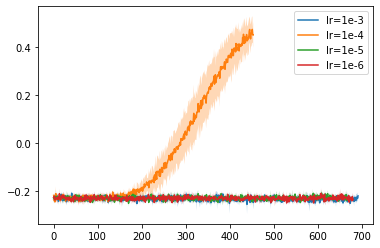

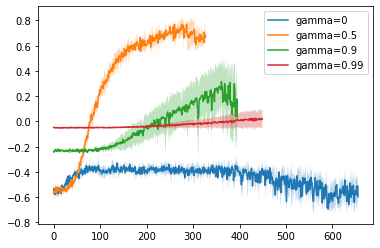

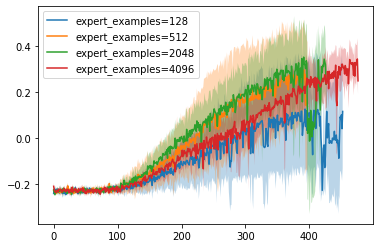

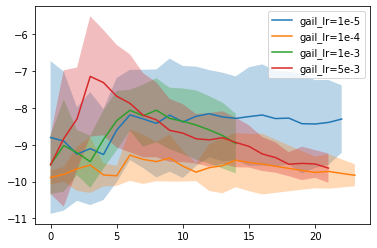

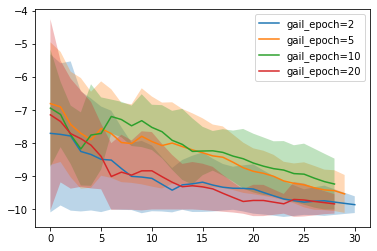

In [26]:
losses = plot_group_rewards(["1::lr=1e-3","2::lr=1e-3","3::lr=1e-3","4::lr=1e-3"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::lr=1e-4","2::lr=1e-4","3::lr=1e-4","4::lr=1e-4"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::lr=1e-5","2::lr=1e-5","3::lr=1e-5","4::lr=1e-5"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::lr=1e-6","2::lr=1e-6","3::lr=1e-6","4::lr=1e-6"], key="rewards", sigma=0)

plt.legend(["lr=1e-3", "lr=1e-4", "lr=1e-5", "lr=1e-6"])
plt.figure()

losses = plot_group_rewards(["1::gamma=0","2::gamma=0","3::gamma=0","4::gamma=0"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gamma=0.5","2::gamma=0.5","3::gamma=0.5","4::gamma=0.5"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gamma=0.9","2::gamma=0.9","3::gamma=0.9","4::gamma=0.9"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gamma=0.99","2::gamma=0.99","3::gamma=0.99","4::gamma=0.99"], key="rewards", sigma=0)

plt.legend(["gamma=0", "gamma=0.5", "gamma=0.9", "gamma=0.99"])

plt.figure()

losses = plot_group_rewards(["1::expert_examples=128","2::expert_examples=128","3::expert_examples=128","4::expert_examples=128"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::expert_examples=512","2::expert_examples=512","3::expert_examples=512","4::expert_examples=512"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::expert_examples=2048","2::expert_examples=2048","3::expert_examples=2048","4::expert_examples=2048"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::expert_examples=4096","2::expert_examples=4096","3::expert_examples=4096","4::expert_examples=4096"], key="rewards", sigma=0)

plt.legend(["expert_examples=128", "expert_examples=512", "expert_examples=2048", "expert_examples=4096"])

plt.figure()

losses = plot_group_rewards(["1::gail_lr=1e-5","2::gail_lr=1e-5","3::gail_lr=1e-5","4::gail_lr=1e-5"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gail_lr=1e-4","2::gail_lr=1e-4","3::gail_lr=1e-4","4::gail_lr=1e-4"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gail_lr=1e-3","2::gail_lr=1e-3","3::gail_lr=1e-3","4::gail_lr=1e-3"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gail_lr=5e-3","2::gail_lr=5e-3","3::gail_lr=5e-3","4::gail_lr=5e-3"], key="rewards", sigma=0)

plt.legend(["gail_lr=1e-5", "gail_lr=1e-4", "gail_lr=1e-3", "gail_lr=5e-3"])


plt.figure()

losses = plot_group_rewards(["1::gail_epoch=2","2::gail_epoch=2","3::gail_epoch=2","4::gail_epoch=2"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gail_epoch=5","2::gail_epoch=5","3::gail_epoch=5","4::gail_epoch=5"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gail_epoch=10","2::gail_epoch=10","3::gail_epoch=10","4::gail_epoch=10"], key="rewards", sigma=0)
losses = plot_group_rewards(["1::gail_epoch=20","2::gail_epoch=20","3::gail_epoch=20","4::gail_epoch=20"], key="rewards", sigma=0)

plt.legend(["gail_epoch=2", "gail_epoch=5", "gail_epoch=10", "gail_epoch=20"])


